Проверка выполнения условий гидростатики и термобаланса.

Date of creation: 14.07.2020

Last updated: 14.07.2020

In [1]:
import math
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import NotebookLoader
import Physics as ph
import SSM18 as s

importing Jupyter notebook from Physics.ipynb
Physics version 1.14 13.07.2020
importing Jupyter notebook from SSM18.ipynb
SSM18 version 1.9 13.07.2020


In [3]:
pi = math.pi
Z = s.Z

In [4]:
def load_model(epoch):
    filename = 'Mass/4epoch%.02d.csv' % epoch
    return pd.read_csv(filename)

In [14]:
epoch = 1
df1 = load_model(epoch)
dimM = len(df1.index)
df1

,Unnamed: 0,Mass,Radius,Temperature,Density,Luminosity,Hydrogen,Opacity,Convection,Pressure,Velocity
0,0,0.000000e+00,0.000000e+00,1.451000e+07,90.073860,0.000000e+00,0.723205,1.445415,0.0,1.794120e+17,1.208753e-10
1,1,1.992041e+29,8.086197e+08,1.448616e+07,89.853305,3.327251e+30,0.723300,1.448873,0.0,1.786787e+17,1.195617e-10
2,2,3.984082e+29,1.019092e+09,1.447218e+07,89.722614,6.633677e+30,0.723355,1.450894,0.0,1.782465e+17,1.187975e-10
3,3,5.976123e+29,1.166858e+09,1.446045e+07,89.612835,9.922761e+30,0.723402,1.452590,0.0,1.778842e+17,1.181611e-10
4,4,7.968163e+29,1.284576e+09,1.444999e+07,89.514752,1.319646e+31,0.723442,1.454104,0.0,1.775610e+17,1.175968e-10
...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,1.991244e+33,4.536990e+10,3.854278e+05,0.035663,3.526911e+33,0.732000,0.825068,1.0,1.886897e+12,2.183289e-26
9997,9997,1.991443e+33,4.560445e+10,3.415529e+05,0.029744,3.526911e+33,0.732000,0.754712,1.0,1.394588e+12,5.057721e-27
9998,9998,1.991642e+33,4.589195e+10,2.883817e+05,0.023070,3.526911e+33,0.732000,0.675243,1.0,9.132617e+11,6.525222e-28
9999,9999,1.991842e+33,4.628649e+10,2.164797e+05,0.014997,3.526911e+33,0.732000,0.578994,1.0,4.456675e+11,2.029214e-29


In [15]:
x = df1['Hydrogen'].values
m = df1['Mass'].values
d = df1['Density'].values
t = df1['Temperature'].values
r = df1['Radius'].values
l = df1['Luminosity'].values
p = df1['Pressure'].values
k = df1['Opacity'].values
c = df1['Convection'].values
v = df1['Velocity'].values

In [16]:
e = np.zeros(dimM) # энерговыделения
a = np.zeros(dimM) # градиент давления
da = np.zeros(dimM) # несоответствие градиента давления
b = np.zeros(dimM) # градиент температуры
br = np.zeros(dimM) # градиент температуры при радиации
bc = np.zeros(dimM) # градиент температуры при конвекции
db = np.zeros(dimM) # несоответствие градиента температуры 

Условие гидростатики

In [17]:
for i in range(1, dimM-1):
    mu = ph.MU(x[i], 1 - x[i] -Z, Z)
    a[i] = -ph.G*m[i]*d[i]/pow(r[i], 2)
    da[i] = (p[i+1] - p[i])/2/(r[i+1] - r[i]) + (p[i] - p[i-1])/2/(r[i] - r[i-1]) #- a[i]
#     da[i] = (p[i+1] - p[i])/(r[i+1] - r[i])
#     print(i, a[i], da[i], pow((a[i] - da[i])/a[i], 2))

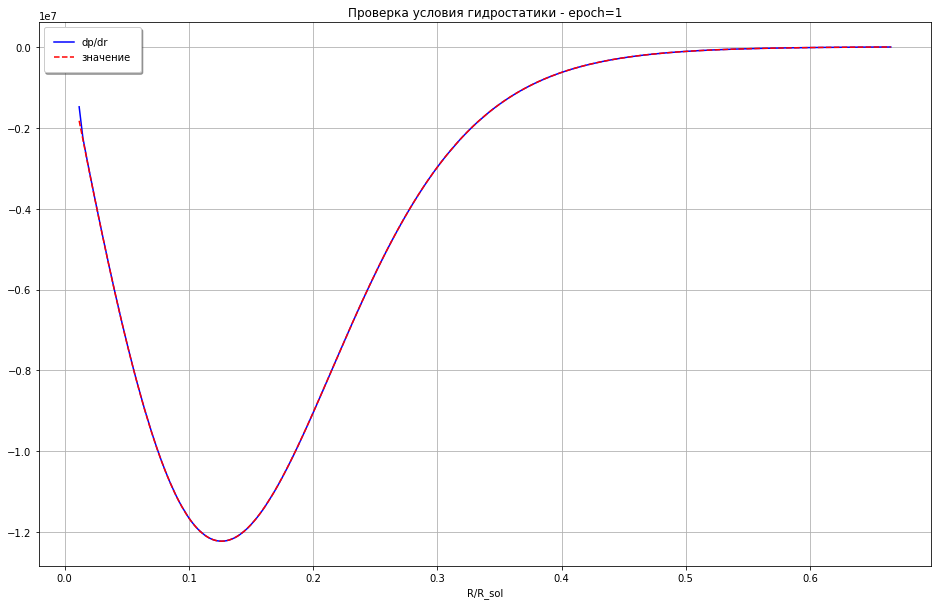

In [18]:
r1 = r[1:-1]/s.R
m1 = m[1:-1]/s.M
a1 = a[1:-1]
da1 = da[1:-1]
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, da1, '-', color='blue', label='dp/dr')
plt.plot(r1, a1, '--', color='red', label='значение')
# plt.xlim(0.9,1.01)
# plt.xlim(0.,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Проверка условия гидростатики - epoch=%d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

Условие переноса энергии

In [19]:
for i in range(1, dimM-1):
    br[i] = -3/16*k[i]*d[i]*l[i]/ph.sigma/pow(t[i], 3)/4/pi/pow(r[i], 2)
    mu = ph.MU(x[i], 1 - x[i] -Z, Z)
    bc[i] = -0.4*mu/ph.kB*ph.m_prot*ph.G*m[i]/pow(r[i], 2)
    if abs(br[i]) < abs(bc[i]):
        b[i] = br[i]
    else:
        b[i] = bc[i]
    db[i] = (t[i+1] - t[i])/2/(r[i+1] - r[i]) + (t[i] - t[i-1])/2/(r[i] - r[i-1]) # - b[i]
#         db[i] = (t[i] - t[i-1])/(r[i] - r[i-1])
#     print(i, b[i], db[i], pow((b[i] - db[i])/b[i], 2))

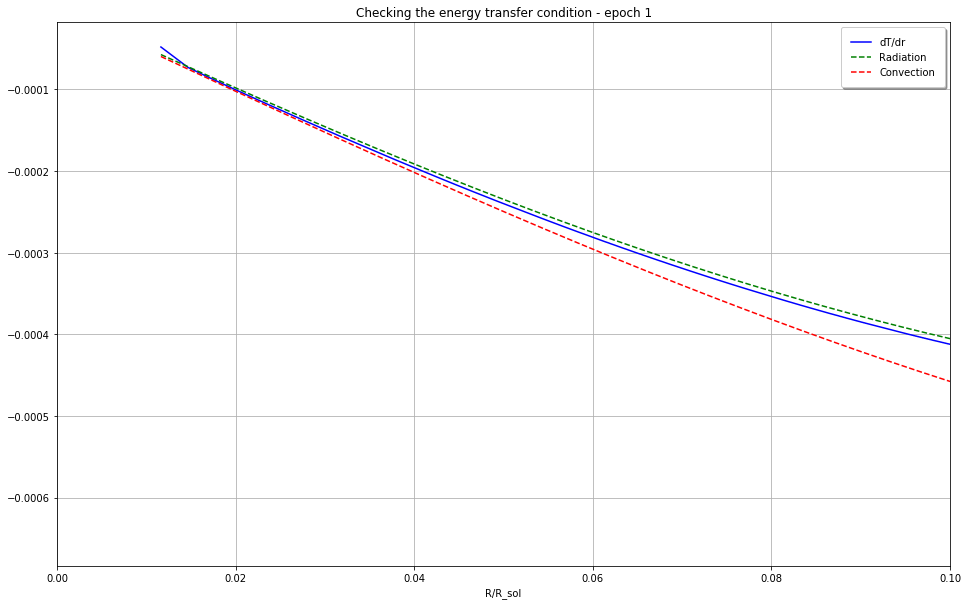

In [21]:
m1 = m[1:-1]/s.M
r1 = r[1:-1]/s.R
b1 = br[1:-1]
b2 = bc[1:-1]
db1 = db[1:-1]
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, db1, '-', color='blue', label='dT/dr')
plt.plot(r1, b1, '--', color='green', label='Radiation')
plt.plot(r1, b2, '--', color='red', label='Convection')
plt.xlim(0.,.1)
# plt.xlim(0.9,1.01)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Checking the energy transfer condition - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

In [133]:
sa = 0
sb = 0
for i in range(1, dimM-1):
    sa += pow((da[i] - a[i]), 2)
    sb += pow((db[i] - b[i]), 2)
pow(sa, 0.5), pow(sb, 0.5)    

(738749.3300151163, 2.369534898793534e-05)

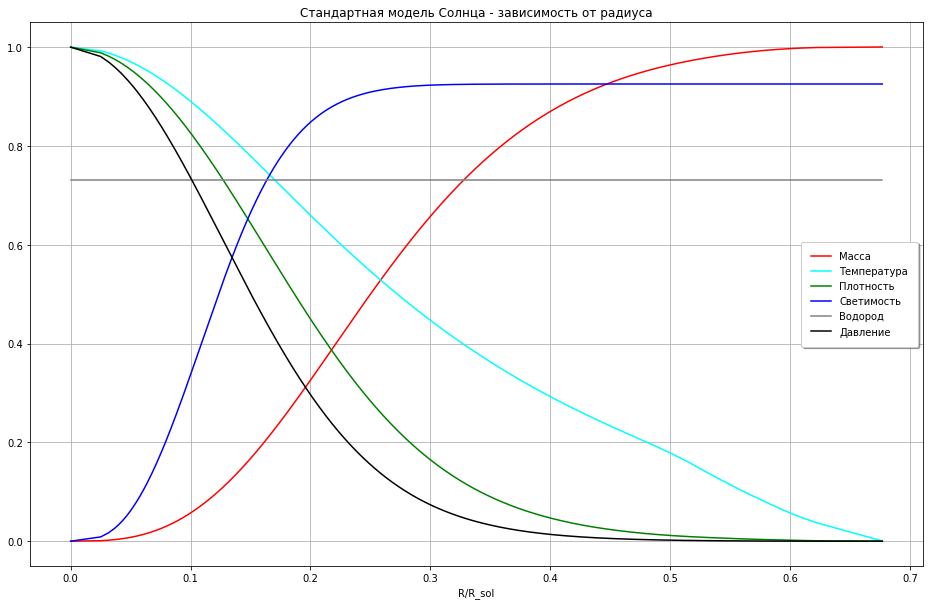

In [137]:
r1 = r/s.R
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, m/s.M, color='red', label='Масса')
plt.plot(r1, t/t[0], color='cyan', label='Температура')
plt.plot(r1, d/d[0], '-', color='green', label='Плотность')
plt.plot(r1, l/s.L, color='blue', label='Светимость')
plt.plot(r1, x, color='gray', label='Водород')
plt.plot(r1, p/p[0], color='black', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Стандартная модель Солнца - зависимость от радиуса')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

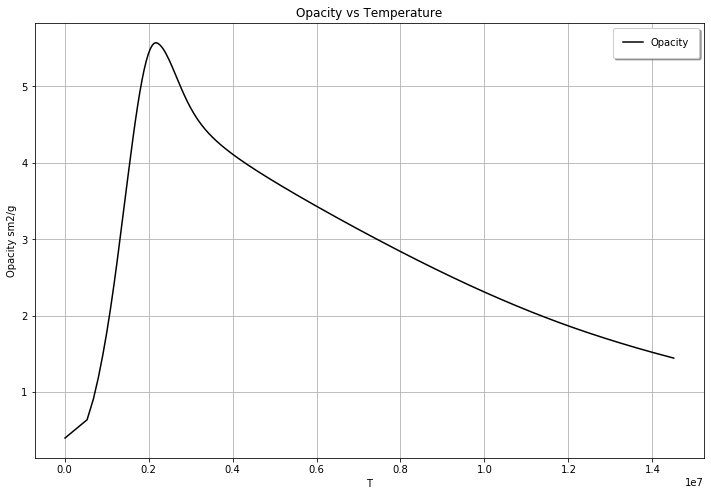

In [138]:
plt.figure(figsize=(12, 8))
ax = plt.axes()
plt.plot(t, k, color='black', label='Opacity')
#plt.xlim(6, 7.25)
#plt.ylim(0, 20)
plt.xlabel('T')
plt.ylabel('Opacity sm2/g')
plt.title('Opacity vs Temperature')
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);